In [9]:
import matplotlib.pyplot as plt
import numpy as np
from pyproj import Transformer, Geod
import geojson
import pandas as pd
import seaborn as sns

# Visualization 1

## Produce a histogram showing the number of fires occurring every 50 mile distance from your assigned city for all fires ranging up to 1800 miles away from your assigned city. Your histogram should indicate the distance cut-off for your modeling work as specified in Step 1.

Re-using part of my code from wildfire_data.ipynb

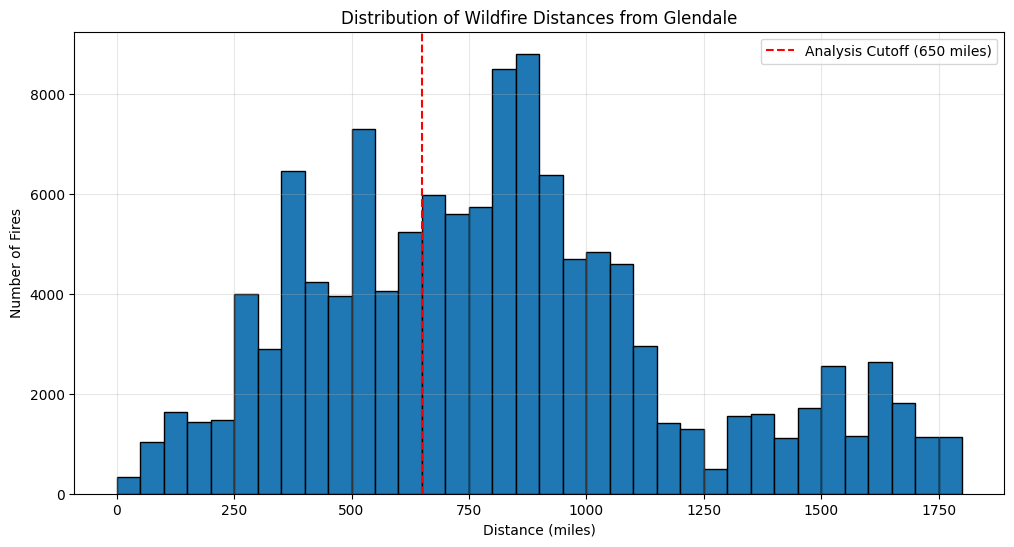

In [ ]:

# Initialize coordinate transformer and geodetic calculator
to_epsg4326 = Transformer.from_crs("ESRI:102008", "EPSG:4326")
geodcalc = Geod(ellps='WGS84')

# City coordinates (Glendale)
city_coords = (33.53, -112.19)  # (lat, lon)
cutoff_distance = 650  # miles

# Calculate distances for all fires
distances = []
with open('../data/USGS_Wildland_Fire_Combined_Dataset.json', 'r') as f:
    data = geojson.load(f)
    
    for feature in data['features']:
        try:
            # Get fire perimeter coordinates
            ring_data = feature['geometry'].get('rings', []) or feature['geometry'].get('curveRings', [])
            if not ring_data:
                continue
                
            # Convert coordinates
            converted_coords = []
            for coord in ring_data[0]:
                if len(coord) >= 2:
                    lat, lon = to_epsg4326.transform(coord[0], coord[1])
                    converted_coords.append((lat, lon))
            
            # Calculate minimum distance to city
            city_lon, city_lat = city_coords[1], city_coords[0]
            fire_distances = []
            for coord in converted_coords:
                d = geodcalc.inv(city_lon, city_lat, coord[1], coord[0])
                distance_miles = d[2] * 0.00062137  # Convert meters to miles
                fire_distances.append(distance_miles)
            
            if fire_distances:
                min_distance = min(fire_distances)
                if min_distance <= 1800:  # Maximum distance to consider
                    distances.append(min_distance)
                    
        except Exception:
            continue

# Create histogram
plt.figure(figsize=(12, 6))
plt.hist(distances, bins=np.arange(0, 1800 + 50, 50), edgecolor='black')
plt.axvline(x=cutoff_distance, color='red', linestyle='--', label=f'Analysis Cutoff ({cutoff_distance} miles)')
plt.title('Distribution of Wilwilwilwilwildfire_dataire_dataire_dataire_dataire Distances from Glendale')
plt.xlabel('Distance (miles)')
plt.ylabel('Number of Fires')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Visualization 2

## Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.

In [7]:
wildfire_data = pd.read_csv("../Step_0_and_Step_1/wildfire_analysis_results/wildfire_impact_glendale_1961_2021.csv")

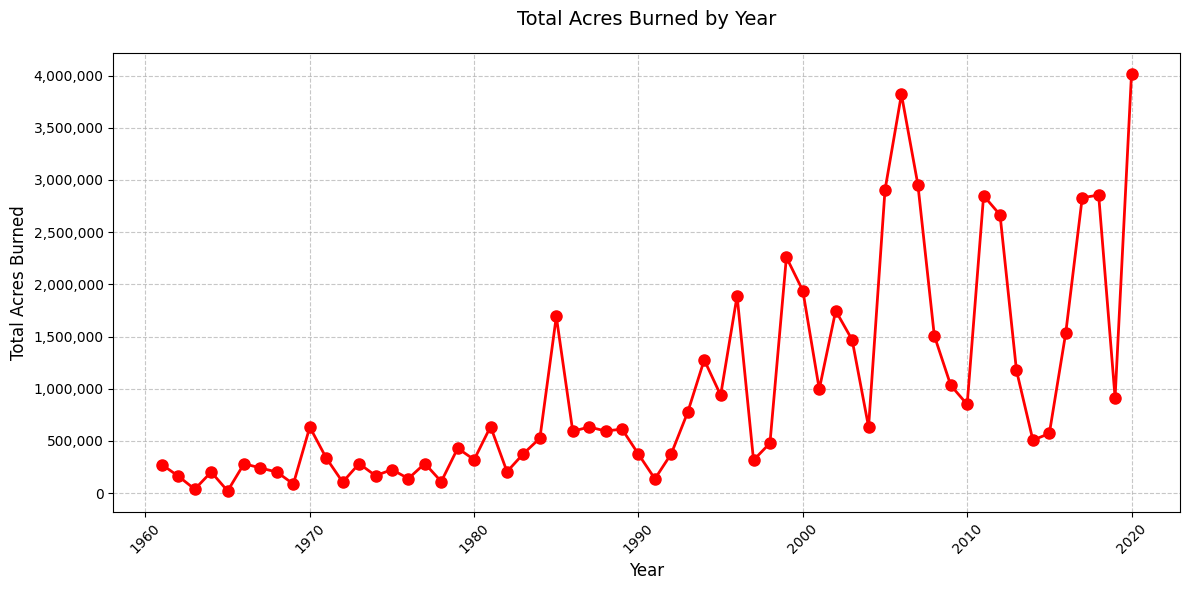

In [11]:
# Create figure with specified size
plt.figure(figsize=(12, 6))

# Create the line plot
plt.plot(wildfire_data['year'], wildfire_data['total_acres'], marker='o', linewidth=2, markersize=8, color='red')

# Customize the plot
plt.title('Total Acres Burned by Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Acres Burned', fontsize=12)

# Format y-axis with comma separator for thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Visualization 3

## Produce a time series graph containing your fire smoke estimates for your city and the AQI estimates for your city.

In [12]:
aqi_data = pd.read_csv("../Step_0_and_Step_1/glendale_AQI.csv")

In [14]:
aqi_data.columns

Index(['Unnamed: 0', 'year', 'smoke_impact_score', 'acres_burned',
       'days_with_data', 'mean_pm25', 'median_pm25', 'max_pm25', 'smoke_days',
       'severe_smoke_days', 'pm25_90th_percentile', 'high_pm25_episodes',
       'pm25_smoke_score', 'weighted_smoke_days'],
      dtype='object')

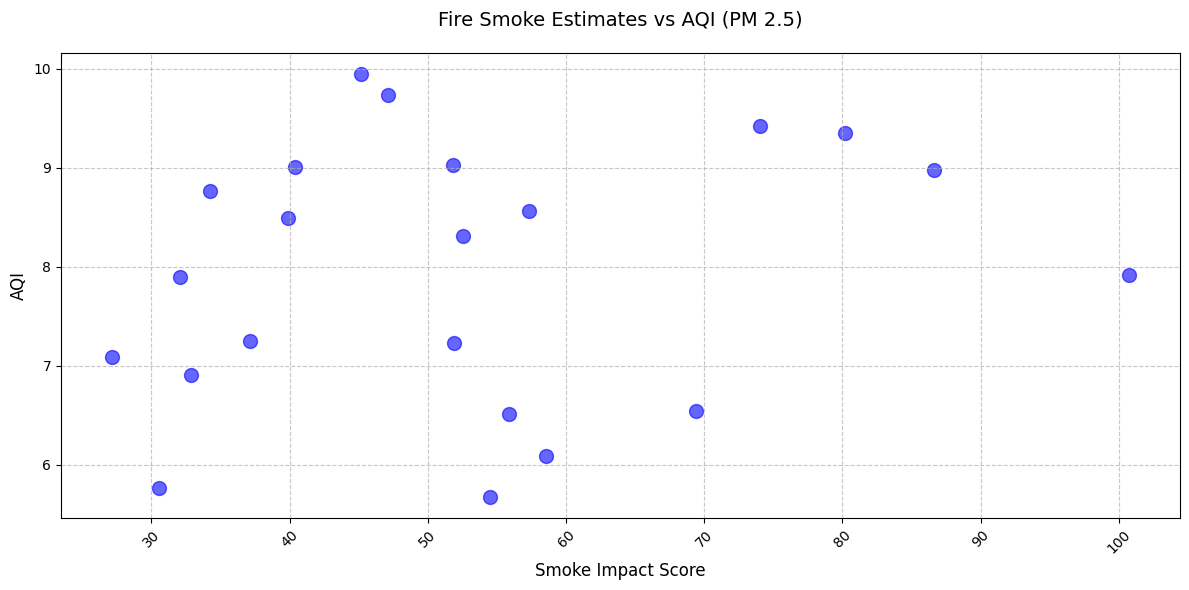

In [16]:
# Create figure with specified size
plt.figure(figsize=(12, 6))

# Create the scatter plot
plt.scatter(aqi_data['smoke_impact_score'], aqi_data['mean_pm25'], 
           s=100,  # Size of markers
           alpha=0.6,  # Transparency of markers
           color='blue')

# Customize the plot
plt.title('Fire Smoke Estimates vs AQI (PM 2.5)', fontsize=14, pad=20)
plt.xlabel('Smoke Impact Score', fontsize=12)
plt.ylabel('AQI', fontsize=12)

# Format y-axis with comma separator for thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()